### Рабочая тетрадь №4. Симакин Сергей Евгеньевич.
```
Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.
```

### 1.1. Теоретический материал – Линейные регрессионные модели.
```
Линейная регрессия (Linear regression) – модель зависимости переменной
y от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
  numpy - numpy.linalg.lstsq
  scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).
```

#### **Пример 1.1.1.**
Проведем прямую 𝑦 = 𝑚x + 𝑏 через экспериментальные точки.

In [1]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# y = mx + b => y = Ap; A = [[x 1]], p = [[m], [c]]
A = np.vstack((x, np.ones(x.shape[0]))).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c, x, y

(0.9999999999999999,
 -0.9499999999999997,
 array([0, 1, 2, 3]),
 array([-1. ,  0.2,  0.9,  2.1]))

[]

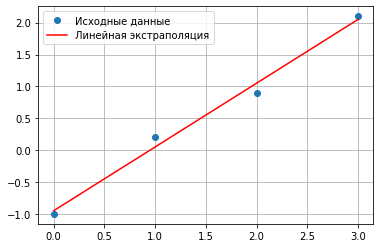

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'o', label='Исходные данные')
ax.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
ax.legend()
ax.grid()
ax.plot()

#### **Пример 1.1.2.**
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла

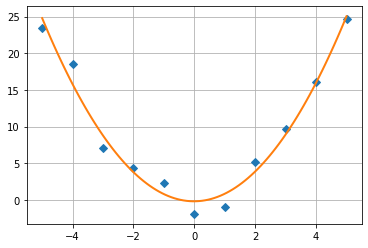

In [4]:
delta = 5
x = np.linspace(-5, 5, 11)
y = x**2 + delta*(np.random.random(x.shape[0])-0.5)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = np.vstack((x**2, x, np.ones(x.shape[0]))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-5, 5, 100)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, 'D')
ax.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()

#### **Пример 1.1.3.**
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка.

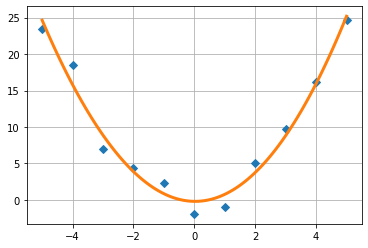

In [5]:
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# Задаем вектор m = [x**3, x**2, x, E]

m = np.vstack((x**3, x**2, x, np.ones(x.shape[0]))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'D')
ax.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)
ax.grid()
plt.show()

#### **Задание**
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

#### **Пример 1.1.4.**
Необходимо проверить гипотезу, что наша точечно заданная функция ложится
на кривую вида $𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1𝑒^{(−𝑏_2𝑥^2)}.$

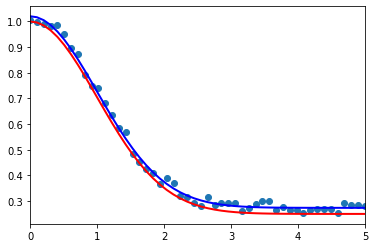

(array([0.27367915, 0.74674092, 0.49962313]),
 2.3323467727162753e-05,
 0.012018101961104475)

In [6]:
from scipy.optimize import curve_fit

def f(x, b0, b1, b2):
  return b0 + b1*np.exp(-b2*x**2)

x_data = np.linspace(0, 5, 50)
y = f(x_data, 0.25, 0.75, 0.5)
y_data = y + 0.05*np.random.random(x_data.shape[0])

b_opt, beta_cov = curve_fit(f, x_data, y_data)
# Вычислим линейное отклонение
lin_dev = beta_cov[0].sum()
# Вычислим квадратичное отклонение
residuals = y_data - f(x_data, b_opt[0], b_opt[1], b_opt[2])
fres = sum(residuals**2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
ax.plot(x_data, y, 'r', lw=2)
ax.plot(x_data, f(x_data, b_opt[0], b_opt[1], b_opt[2]), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

b_opt, lin_dev, fres

#### **Пример 1.1.5.**
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
$$
1) 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1𝑥 \\
2) 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1𝑥 + 𝑏_2𝑥^2 \\
3) 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1𝑙n(𝑥) \\
4) 𝑓(𝑥, 𝑏) = 𝑏_0𝑥^{𝑏_1}
$$


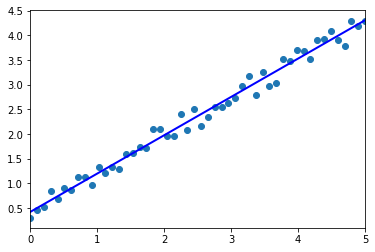

(array([0.27367915, 0.74674092, 0.49962313]),
 0.0011592677578474075,
 1.0193561410804572)

In [7]:
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1*x

x_data = np.linspace(0, 5, 50)
y = f(x_data, *beta)
y_data = y + 0.5*np.random.random(x_data.shape[0])
beta_opt, beta_cov = curve_fit(f, x_data, y_data)

lin_dev = beta_cov[0].sum()
residuals = y_data - f(x_data, *beta_opt)
fres = sum(residuals**2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
ax.plot(x_data, f(x_data, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

b_opt, lin_dev, fres

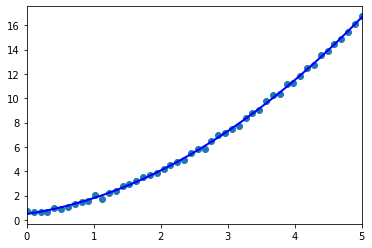

(array([0.27367915, 0.74674092, 0.49962313]),
 0.0009688696874040198,
 0.8079358981011641)

In [8]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1*x + b2*x*x

x_data = np.linspace(0, 5, 50)
y = f(x_data, *beta)
y_data = y + 0.5*np.random.random(x_data.shape[0])
beta_opt, beta_cov = curve_fit(f, x_data, y_data)

lin_dev = sum(beta_cov[0])
residuals = y_data - f(x_data, *beta_opt)
fres = sum(residuals**2)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_data, y_data)
ax.plot(x_data, f(x_data, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

b_opt, lin_dev, fres

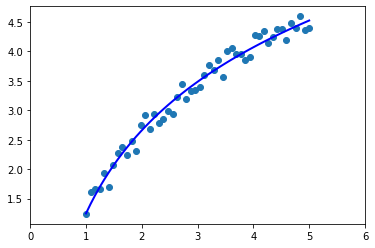

(array([0.27367915, 0.74674092, 0.49962313]),
 0.0003899778799080695,
 0.9018009690396463)

In [9]:
beta = (1, 2)
def f(x, b0, b1):
  return b0 + b1*np.log(x)

x_data = np.linspace(1, 5, 50)
y = f(x_data, *beta)
y_data = y + 0.5*np.random.random(x_data.shape[0])
beta_opt, beta_cov = curve_fit(f, x_data, y_data)

lin_dev = sum(beta_cov[0])
residuals = y_data - f(x_data, *beta_opt)
fres = sum(residuals**2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
ax.plot(x_data, f(x_data, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 6)
plt.show()

b_opt, lin_dev, fres

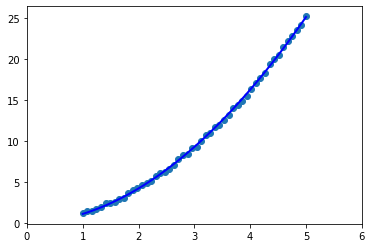

(array([0.27367915, 0.74674092, 0.49962313]),
 6.960877127677273e-05,
 1.28409101301447)

In [10]:
beta = (1, 2)
def f(x, b0, b1):
  return b0*x**b1

x_data = np.linspace(1, 5, 50)
y = f(x_data, *beta)
y_data = y + 0.5*np.random.random(x_data.shape[0])
beta_opt, beta_cov = curve_fit(f, x_data, y_data)

lin_dev = sum(beta_cov[0])
residuals = y_data - f(x_data, *beta_opt)
fres = sum(residuals**2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
ax.plot(x_data, f(x_data, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 6)
plt.show()

b_opt, lin_dev, fres

#### **Задание**
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

### 1.2. Теоретический материал – Задачи регрессии.
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имеем дело с множественной линейной регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных

#### **Пример 1.2.1.**
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

time = [i for i in np.arange(0.5, 5.60, 0.25)]
grade = [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93,90]

dataset = pd.DataFrame(zip(time, grade), columns=['Учебное время', 'Оценка'])
display(dataset.head(), dataset.shape, dataset.describe())

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


(21, 2)

,Учебное время,Оценка
count,21.000000,21.000000
mean,3.000000,55.428571
std,1.551209,26.956579
min,0.500000,10.000000
25%,1.750000,33.000000
50%,3.000000,62.000000
75%,4.250000,76.000000
max,5.500000,93.000000


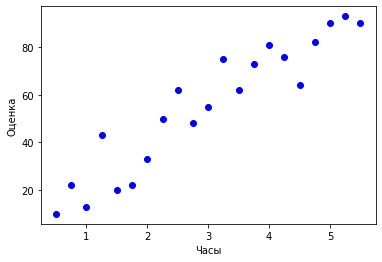

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'Данные экзамена')
ax.set_xlabel('Часы')
ax.set_ylabel('Оценка')
plt.show()

In [13]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor.intercept_, regressor.coef_

(6.723801065719364, array([15.84369449]))

In [14]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sort_index(inplace = True)
df

,Actual,Predicted
4,20,30.489343
7,50,42.372114
11,75,58.215808
12,62,62.176732
14,81,70.098579


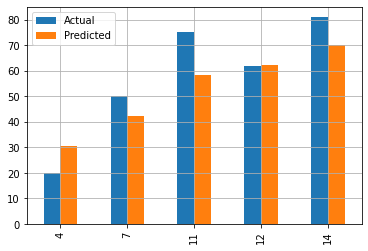

In [15]:
df.plot(kind='bar')
plt.grid()
plt.show()

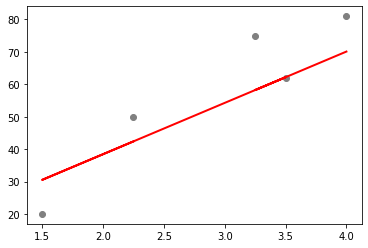

In [16]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#### **Задание**.
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [17]:
path = '/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./4/data.csv'
data = pd.read_csv(path)
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor.intercept_, regressor.coef_

(23913.793166860036, array([9715.83973815]))

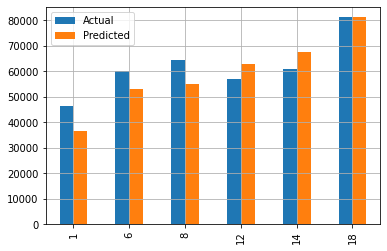

In [19]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sort_index(inplace = True)
df.plot(kind='bar')
plt.grid()
plt.show()

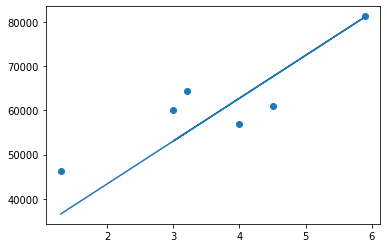

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

### 1.3. Теоретический материал – Множественная регрессия.
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

#### **Пример 1.3.1.**
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [21]:
X = np.array([[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
              [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
              [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]).T
X = np.c_[X, np.ones(X.shape[0])]
y = np.array([1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1])
linreg = np.linalg.lstsq(X, y, rcond = None)[0]
linreg

array([ 0.1338682 ,  0.26840334, -0.02874936,  1.5122571 ])

#### **Пример 1.3.2.**
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [22]:
X.shape, y.shape

((23, 4), (23,))

In [23]:
X = np.array([[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
              [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
              [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]])
y = np.array([1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]).reshape(1, 23)
df = pd.DataFrame(np.concatenate((X, y), axis=0).T, columns=['x1', 'x2', 'x3', 'y'])
df.head()

,x1,x2,x3,y
0,0,4,4,1
1,2,1,1,2
2,4,2,2,3
3,1,3,5,4
4,5,4,6,3


In [24]:
X = df[['x1', 'x2', 'x3']]
y = df[['y']]

display(X.head(), y.head())

,x1,x2,x3
0,0,4,4
1,2,1,1
2,4,2,2
3,1,3,5
4,5,4,6


,y
0,1
1,2
2,3
3,4
4,3


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
df_coef = pd.DataFrame(regressor.coef_.T, index=X.columns, columns=['Коэффициенты'])
df_coef

,Коэффициенты
x1,0.103350
x2,0.239995
x3,-0.007726


In [26]:
y_pred = regressor.predict(X_test)
df_end = pd.DataFrame(y_pred, columns=['Предсказанные'])
df_end = pd.concat([df_end, y_test.reset_index(drop=True)], axis=1)
df_end.columns = ['Предсказанные', 'Тестовые']
df_end

,Предсказанные,Тестовые
0,2.016099,2
1,3.653174,5
2,2.669494,3
3,4.222932,6
4,3.007505,3


In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_end['Предсказанные'], df_end['Тестовые'])

1.0162921238149205

#### **Задание**
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [28]:
path = '/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./4/another_data.csv'
data = pd.read_csv(path)
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [29]:
data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [30]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
df_coef = pd.DataFrame(regressor.coef_, index=['x1', 'x2', 'x3', 'x4'], columns=['Коэффициенты'])
df_coef

,Коэффициенты
x1,-28.030561
x2,-0.078420
x3,-0.000556
x4,1454.127178


In [32]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

37.01573054764625

In [33]:
df_end = pd.concat([pd.DataFrame(y_pred), y_test.reset_index(drop=True)], axis=1)
df_end.columns = ['Предсказанное', 'Истинное']
df_end

,Предсказанное,Истинное
0,559.613431,508
1,695.649467,782
2,581.612981,554
3,584.043764,561
4,499.714846,460
5,304.750727,344
6,564.635611,571
7,652.685727,640
8,476.533743,534
9,502.206540,487


#### **Задание***
Вариант №5.

In [52]:
x = np.array([5, 5.2, 5.4, 5.6, 5.8, 6])
y = np.array([2, 4, 4, 3, 3, 3])
df = pd.DataFrame(zip(x,y), columns=['x', 'y'])
df

,x,y
0,5.0,2
1,5.2,4
2,5.4,4
3,5.6,3
4,5.8,3
5,6.0,3


In [55]:
regressor = LinearRegression()
regressor.fit(df['x'].values.reshape((-1,1)), df['y'].values.reshape((-1,1)))
regressor.coef_, regressor.intercept_

(array([[0.14285714]]), array([2.38095238]))

In [40]:
display(df['x']*df['y'], (df['x']*df['y']).sum())

0    10.0
1    20.8
2    21.6
3    16.8
4    17.4
5    18.0
dtype: float64

104.6

In [43]:
df['x'].sum(), (df['x']**2).sum()

(33.0, 182.20000000000002)

In [60]:
df['y'].sum()

19

In [74]:
(df['x']**3).sum()

1009.8

In [75]:
(df['x']**4).sum()

5617.566400000001

In [76]:
((df['x']**2)*df['y']).sum()

577.8000000000001

In [80]:
def f(x, b0, b1, b2):
  return b0 + b1*x + b2*x*x

beta_opt, beta_cov = curve_fit(f, x, y)

lin_dev = sum(beta_cov[0])
residuals = y_data - f(x_data, *beta_opt)
fres = sum(residuals**2)

b_opt

array([0.27367915, 0.74674092, 0.49962313])